**MENGIMPOR LIBRARY YANG DIBUTUHKAN**

In [ ]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

In [ ]:
# install kaggle package
!pip install -q kaggle 

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"afifxxiv","key":"8a5bd89b9d50a3d7cf0c65d6043bfd5a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


**MENYIAPKAN DATASET**

In [ ]:
# Download dataset
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 61.1MB/s]


**DATA UNDERSTANDING**

In [ ]:
# unzip
!mkdir data
!unzip -qq indonesia-tourism-destination.zip -d data
!ls data

package_tourism.csv  tourism_rating.csv  tourism_with_id.csv  user.csv


Menyimpan dataset ke dalam variabel

In [ ]:
rating = pd.read_csv('data/tourism_rating.csv')
place = pd.read_csv('data/tourism_with_id.csv')
user = pd.read_csv('data/user.csv')

Melihat data place

In [ ]:
place.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Menghapus kolom yang tidak diperlukan

In [ ]:
place = place.drop(['Unnamed: 11','Unnamed: 12','Time_Minutes'],axis=1)
place.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Memilih data destinasi wisata di Kota Semarang

In [ ]:
place = place[place['City']=='Semarang']
place.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,"{'lat': -7.209886700000002, 'lng': 110.3421119}",-7.209887,110.342112
335,336,Grand Maerakaca,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Taman Hiburan,Semarang,15000,4.4,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960522,110.386394
336,337,Kampung Pelangi,Kampung pelangi atau dalam bahasa Inggris dise...,Taman Hiburan,Semarang,3000,4.3,"{'lat': -6.988881200000001, 'lng': 110.4083781}",-6.988881,110.408378
337,338,Lawang Sewu,"Lawang Sewu (""Seribu Pintu"") (bahasa Jawa: ꦭꦮꦁ...",Budaya,Semarang,10000,4.6,"{'lat': -6.9839099, 'lng': 110.4104342}",-6.983910,110.410434
338,339,Sam Poo Kong Temple,"Sam Poo Kong (Hanzi: ; Pinyin: Sānbǎo Dòng), j...",Budaya,Semarang,35000,4.5,"{'lat': -6.996236599999999, 'lng': 110.398122}",-6.996237,110.398122


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 334 to 390
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     57 non-null     int64  
 1   Place_Name   57 non-null     object 
 2   Description  57 non-null     object 
 3   Category     57 non-null     object 
 4   City         57 non-null     object 
 5   Price        57 non-null     int64  
 6   Rating       57 non-null     float64
 7   Coordinate   57 non-null     object 
 8   Lat          57 non-null     float64
 9   Long         57 non-null     float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.9+ KB


Melihat gambaran data rating

In [ ]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Semarang

In [ ]:
rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,5,335,3
1,20,335,4
2,41,335,5
3,55,335,2
4,70,335,3


Melihat ukuran dataset rating untuk Kota Semarang

In [ ]:
rating.shape

(1317, 3)

Melihat gambaran data user

In [ ]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Semarang

In [ ]:
user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
23,1,"Semarang, Jawa Tengah",20
725,2,"Bekasi, Jawa Barat",21
1105,3,"Cirebon, Jawa Barat",23
326,4,"Bekasi, Jawa Barat",21
0,5,"Lampung, Sumatera Selatan",20


In [ ]:
user.shape

(297, 3)

**EKSPLORASI DATASET**

Membuat dataframe berisi lokasi dan membuat visualisasi wisata dengan jumlah rating terbanyak

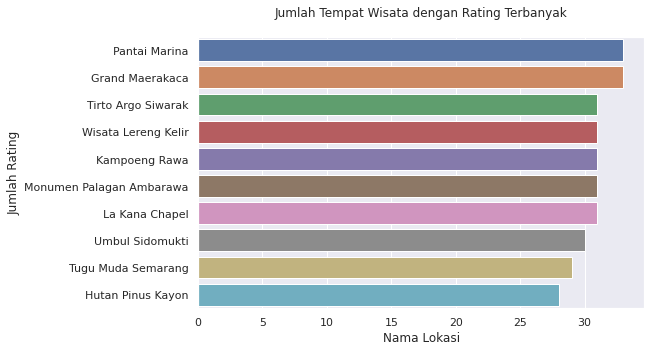

In [ ]:
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

Membuat visualisasi perbandingan jumlah kategori wisata di Kota Semarang

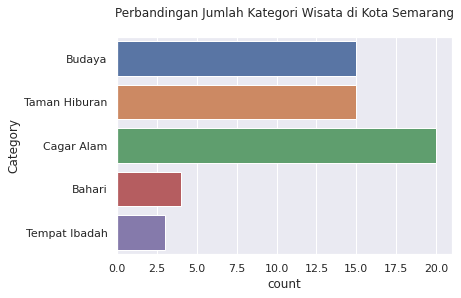

In [ ]:
sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Semarang', pad=20)
plt.show()

Membuat visualisasi distribusi usia user

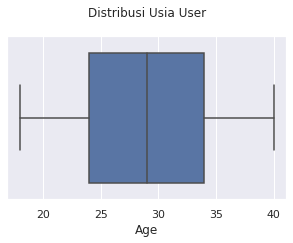

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

Membuat visualisasi distribusi harga masuk tempat wisata

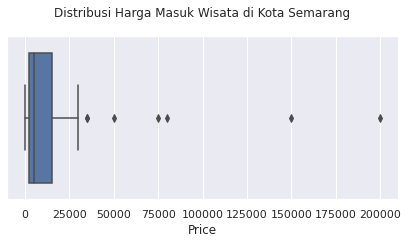

In [ ]:
plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Semarang', pad=20)
plt.show()


Memfilter dan memvisualisasi asal kota user

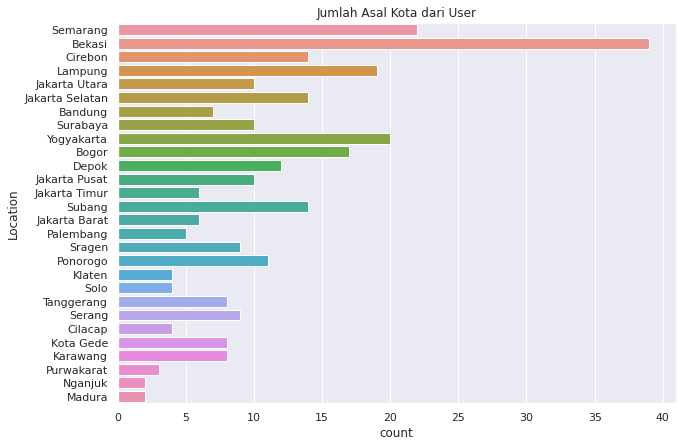

In [ ]:
asalkota = user['Location'].apply(lambda x : x.split(',')[0])

plt.figure(figsize=(10,7))
sns.countplot(y=asalkota)
plt.title('Jumlah Asal Kota dari User')
plt.show()

**MENYIAPKAN DATA UNTUK PEMODALAN**

Membaca dataset untuk dilakukan encoding

In [ ]:
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,5,335,3
1,20,335,4
2,41,335,5
3,55,335,2
4,70,335,3


Membuat Fungsi untuk melakukan Encoding

In [ ]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

Encoding dan Mapping User_Id ke dataframe

In [ ]:
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

df['user'] = df['User_Id'].map(user_to_user_encoded)

Encoding dan Mapping Place_Id ke dataframe place

In [ ]:
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

df['place'] = df['Place_Id'].map(place_to_place_encoded)

Mendapatkan jumlah user, place dan rating

In [ ]:
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 297, Number of Place: 57, Min Rating: 1.0, Max Rating: 5.0


Mengacak dataset

In [ ]:
df = df.sample(frac=1, random_state=42)
df.head(5)

,User_Id,Place_Id,Place_Ratings,user,place
261,83,345,4.0,176,10
991,47,377,1.0,173,42
554,288,358,5.0,225,23
49,255,336,5.0,44,1
857,238,371,3.0,228,36


**PEMODELAN MACHINE LEARNING DENGAN RECOMMENDERNET**

Membagi data train dan data test

In [ ]:
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

Inisialisasi Fungsi

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Inisialisasi Model

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Inisialisasi Callback

In [ ]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

Memulai training

In [ ]:
# Memulai training 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
33/33 [==============================] - 2s 13ms/step - loss: 0.7615 - root_mean_squared_error: 0.3845 - val_loss: 0.7536 - val_root_mean_squared_error: 0.3810
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7174 - root_mean_squared_error: 0.3611 - val_loss: 0.7540 - val_root_mean_squared_error: 0.3812
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7210 - root_mean_squared_error: 0.3634 - val_loss: 0.7542 - val_root_mean_squared_error: 0.3814
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.7322 - root_mean_squared_error: 0.3703 - val_loss: 0.7533 - val_root_mean_squared_error: 0.3810
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.7435 - root_mean_squared_error: 0.3756 - val_loss: 0.7534 - val_root_mean_squared_error: 0.3809
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.7233 - root_mean_squared_error: 0.3644 - val_loss: 0.7530 - val_root_

Menampilkan plot loss dan validation

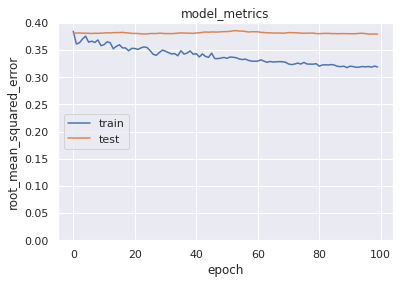

In [ ]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

**MEMPREDIKSI 5 TERATAS REKOMENDASI**

Menyiapkan dataframe

In [ ]:
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

Mengambil sample user

In [ ]:
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

Membuat data lokasi yang belum dikunjungi user

In [ ]:
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

Mengambil top 5 rekomendasi

In [ ]:
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 5 Tempat Wisata Di Semarang')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

Daftar rekomendasi untuk: User 24

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Lawang Sewu : Budaya
Pantai Marina : Bahari
Gua Maria Kerep Ambarawa : Cagar Alam
Jembatan Biru Ambarawa : Taman Hiburan

------------------------------------------------------------
Top 5 Tempat Wisata Di Semarang
------------------------------------------------------------
1 . Candi Gedong Songo 
     Budaya , Harga Tiket Masuk  10000 , Rating Wisata  4.5 

2 . Monumen Palagan Ambarawa 
     Budaya , Harga Tiket Masuk  7500 , Rating Wisata  4.4 

3 . La Kana Chapel 
     Taman Hiburan , Harga Tiket Masuk  35000 , Rating Wisata  4.5 

4 . Kampoeng Kopi Banaran 
     Taman Hiburan , Harga Tiket Masuk  200000 , Rating Wisata  4.3 

5 . Obyek Wisata Goa Kreo 
     Cagar Alam , Harga Tiket Masuk  5500 , Rating Wisata  4.3 

